# Mental Health Survey 

This project aims to extract meaningful insights from Open Source Mental Illness (OSMI) database based on survey responses on age, gender, occupation, individual responses, and more.

1. Importing dependencies for SQL connection

In [2]:
import sqlite3
import pandas as pd

2. Establishing connection between SQL Database and python

In [11]:
con = sqlite3.connect("mental_health.sqlite")

3. Understanding the table and data types (eg, data types, columns, keys, etc).



In [12]:
table = pd.read_sql('''
SELECT * FROM sqlite_master 
WHERE TYPE = 'table'; ''',con)
table

,type,name,tbl_name,rootpage,sql
0,table,Answer,Answer,2,"CREATE TABLE ""Answer"" (\n\t""AnswerText"" VARCHA..."
1,table,Question,Question,1434,"CREATE TABLE ""Question"" (\n\t""questiontext"" VA..."
2,table,Survey,Survey,1438,"CREATE TABLE ""Survey"" (\n\t""SurveyID"" INTEGER ..."


In [13]:
for row in table["sql"]:
    print(row)

CREATE TABLE "Answer" (
	"AnswerText" VARCHAR(10000) NULL,
	"SurveyID" INTEGER NULL,
	"UserID" INTEGER NULL,
	"QuestionID" INTEGER NULL
)
CREATE TABLE "Question" (
	"questiontext" VARCHAR(1000) NULL,
	"questionid" INTEGER NULL
)
CREATE TABLE "Survey" (
	"SurveyID" INTEGER NOT NULL,
	"Description" VARCHAR(255) NULL,
	PRIMARY KEY ("SurveyID")
)


In [14]:
survey = pd.read_sql_query('''SELECT * FROM Survey''', con)
survey

,SurveyID,Description
0,2014,mental health survey for 2014
1,2016,mental health survey for 2016
2,2017,mental health survey for 2017
3,2018,mental health survey for 2018
4,2019,mental health survey for 2019


The three tables are connected by the SurveyID and QuestionID/questionid.

In [15]:
question = pd.read_sql_query('''SELECT * FROM Question''', con)

for index, row in question.iterrows():
    print(row['questionid'], row['questiontext'])

1 What is your age?
2 What is your gender?
3 What country do you live in?
4 If you live in the United States, which state or territory do you live in?
5 Are you self-employed?
6 Do you have a family history of mental illness?
7 Have you ever sought treatment for a mental health disorder from a mental health professional?
8 How many employees does your company or organization have?
9 Is your employer primarily a tech company/organization?
10 Does your employer provide mental health benefits as part of healthcare coverage?
11 Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?
12 Would you bring up a mental health issue with a potential employer in an interview?
13 Is your primary role within your company related to tech/IT?
14 Do you know the options for mental health care available under your employer-provided health coverage?
15 Has your employer ever formally discussed mental health (for exampl

In [17]:
question[question.duplicated(['questiontext'], keep=False)] #none
question

,questiontext,questionid
0,What is your age?,1
1,What is your gender?,2
2,What country do you live in?,3
3,"If you live in the United States, which state ...",4
4,Are you self-employed?,5
...,...,...
100,Do you think that team members/co-workers woul...,114
101,"If yes, what condition(s) have you been diagno...",115
102,"If maybe, what condition(s) do you believe you...",116
103,Which of the following best describes your wor...,117


In [18]:
answers = pd.read_sql_query('''SELECT * FROM Answer''', con)
answers

,AnswerText,SurveyID,UserID,QuestionID
0,37,2014,1,1
1,44,2014,2,1
2,32,2014,3,1
3,31,2014,4,1
4,31,2014,5,1
...,...,...,...,...
236893,Other,2016,2689,117
236894,Support,2016,2690,117
236895,Back-end Developer,2016,2691,117
236896,DevOps/SysAdmin,2016,2692,117


Following Questions have been tried to answer in the following section:
1. How does mental health diagnoses and mental health support differ across age, sex, race, and work position?
2. Does working remotely impact mental health diagnoses? What about mental health support?
3. Who would benefit the most from additional programs?
4. What do individuals in the survey believe would improve mental health support in their companies?

In [19]:
age = pd.read_sql_query('''
SELECT AnswerText AS age, UserID AS id
FROM Answer, Question
WHERE Answer.QuestionID=Question.questionid
AND Answer.QuestionID=1;
''',con)
age

,age,id
0,-1,391
1,-1,716
2,-1,1128
3,-1,3447
4,-1,3449
...,...,...
4213,70,2482
4214,72,1183
4215,74,2378
4216,8,990


In [20]:
mhd = pd.read_sql_query('''
SELECT UserID AS id, AnswerText AS mhd
FROM Answer, Question
WHERE Answer.QuestionID=Question.questionid
AND Answer.QuestionID=33; 
''',con)
mhd

,id,mhd
0,1261,No
1,1262,Yes
2,1263,No
3,1264,Yes
4,1265,Yes
...,...,...
2953,4214,Possibly
2954,4215,No
2955,4216,No
2956,4217,Possibly


In [21]:
resources = pd.read_sql_query('''
SELECT AnswerText AS resources, UserID AS id
FROM Answer
WHERE QuestionID=16;
''',con)
resources

,resources,id
0,No,1261
1,Yes,1262
2,No,1263
3,-1,1264
4,No,1265
...,...,...
2953,I don't know,4214
2954,-1,4215
2955,-1,4216
2956,No,4217


In [22]:
benefits = pd.read_sql_query('''
SELECT AnswerText AS benefits, UserID AS id
FROM Answer
WHERE QuestionID=10;
''',con)
benefits

,benefits,id
0,Yes,1
1,Don't know,2
2,No,3
3,No,4
4,Yes,5
...,...,...
4213,I don't know,4214
4214,-1,4215
4215,-1,4216
4216,No,4217


In [23]:
conversations = pd.read_sql_query('''
SELECT AnswerText AS conversations, UserID AS id
FROM Answer
WHERE QuestionID=19;
''',con)
conversations 

,conversations,id
0,Yes,1261
1,Yes,1262
2,Maybe,1263
3,-1,1264
4,No,1265
...,...,...
2953,No,4214
2954,-1,4215
2955,-1,4216
2956,No,4217


In [24]:
poor_support = pd.read_sql_query('''
SELECT AnswerText AS poorsupport, UserID AS id
FROM Answer
WHERE QuestionID=56;
''',con)
poor_support

,poorsupport,id
0,No,1261
1,No,1262
2,Maybe/Not sure,1263
3,No,1264
4,"Yes, I experienced",1265
...,...,...
2953,"Yes, I observed",4214
2954,"Yes, I observed",4215
2955,I've always been self-employed,4216
2956,Maybe/Not sure,4217


In [25]:
good_support = pd.read_sql_query('''
SELECT AnswerText AS goodsupport, UserID AS id
FROM Answer
WHERE QuestionID=83;
''',con)
good_support

,goodsupport,id
0,"Yes, I experienced",2694
1,Maybe/Not sure,2695
2,"Yes, I experienced",2696
3,Maybe/Not sure,2697
4,"Yes, I observed",2698
...,...,...
1520,Maybe/Not sure,4214
1521,No,4215
1522,I've always been self-employed,4216
1523,"Yes, I experienced",4217


In [28]:
import numpy as np 
import scipy as scipy
from scipy import stats
from sklearn.impute import KNNImputer
import matplotlib.pyplot as plt
import scipy.stats
import seaborn as sb
from statsmodels.graphics.mosaicplot import mosaic
import statsmodels.formula.api as sm 
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.anova import AnovaRM
from statsmodels.graphics.factorplots import interaction_plot
from scipy.stats import friedmanchisquare, wilcoxon
import itertools
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from sklearn import tree 
import graphviz
!pip install scikit-posthocs
import scikit_posthocs as sp
!pip install apyori 
from apyori import apriori
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from matplotlib import rcParams
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.decomposition import PCA
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import mutual_info_regression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
!pip install association-metrics
import association_metrics 
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.inspection import permutation_importance

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5975 sha256=1e818882146140641d736521a8052c70c82224a722f290bae13db45410237ffb
  Stored in directory: c:\users\ishit\appdata\local\pip\cache\wheels\84\45\a4\8ade6576f75410d8162c6da1de0aa9df56c16c711acab5a813
Successfully built apyori
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for association-metrics: filename=association_metrics-0.0.1-py3-none-any.whl size=3951 sha256=150d3236dba914d87a149a843ba4e5a6c068099b1212b21080903dbd6de542c4
  Stored in directory: c:\users\ishit\appdata\local\pip\cache\wheels\0d\79\eb\a94e5047ff6b5c2235b4fac189583a20ed0af980f65ce778eb
Successfully built association-metrics


In [27]:
!pip install graphviz


     ---------------------------------------- 47.0/47.0 kB 2.3 MB/s eta 0:00:00


In [29]:
data = mhd.merge(benefits, how='outer', on='id')
data = data.merge(resources, how='outer', on='id')
data = data.merge(conversations, how='outer', on='id')
data = data.merge(poor_support, how='outer', on='id')
data = data.merge(good_support, how='outer', on='id')
data = data.merge(age, how='outer', on='id')
data.head()

,id,mhd,benefits,resources,conversations,poorsupport,goodsupport,age
0,1261,No,Not eligible for coverage / NA,No,Yes,No,NaN,39
1,1262,Yes,No,Yes,Yes,No,NaN,29
2,1263,No,No,No,Maybe,Maybe/Not sure,NaN,38
3,1264,Yes,-1,-1,-1,No,NaN,43
4,1265,Yes,Yes,No,No,"Yes, I experienced",NaN,43


In [30]:
data.describe(include='all')

,id,mhd,benefits,resources,conversations,poorsupport,goodsupport,age
count,4218.000000,2958,4218,2958,2958,2958,1525,4218
unique,NaN,5,6,4,4,6,6,65
top,NaN,Yes,Yes,No,Yes,No,No,30
freq,NaN,1237,1744,1084,932,1207,541,250
mean,2109.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,1217.776047,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,1055.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,2109.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,3163.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


It looks like "-1" is their version of 'NA'. Let's do some cleaning of the rows. First, mental health diagnoses (mhd).

4. Cleaning columns

In [31]:
data['mhd'].value_counts()

Yes           1237
No             969
Maybe          327
Possibly       301
Don't Know     124
Name: mhd, dtype: int64

In [32]:
mappings = {'Yes':'Y',
           'No':'N',
           'Maybe':'Y',
           'Possibly':'Y',
           "Don't Know":'N'}

data['mhd'] = data['mhd'].replace(mappings)
data['mhd'].value_counts()

Y    1865
N    1093
Name: mhd, dtype: int64

In [33]:
data['benefits'].value_counts()

Yes                               1744
No                                 756
I don't know                       658
-1                                 504
Don't know                         408
Not eligible for coverage / NA     148
Name: benefits, dtype: int64

In [34]:
mappings = {'Yes':'Y',
           "I don't know": 'U',
           '-1':np.nan,
           'No':'N',
            "Don't know":'U',
           'Not eligible for coverage / NA': np.nan}

data['benefits'] = data['benefits'].replace(mappings)
data['benefits'].value_counts()

Y    1744
U    1066
N     756
Name: benefits, dtype: int64

In [35]:
data['resources'].value_counts()

No              1084
Yes              702
I don't know     668
-1               504
Name: resources, dtype: int64

In [36]:
mappings = {'No':'N',
           'Yes':'Y',
           "I don't know":'U',
           '-1':np.nan}
data['resources'] = data['resources'].replace(mappings)
data['resources'].value_counts()

N    1084
Y     702
U     668
Name: resources, dtype: int64

In [37]:
data['conversations'].value_counts()

Yes      932
Maybe    815
No       707
-1       504
Name: conversations, dtype: int64

In [38]:
mappings = {'Yes':'Y',
           'Maybe':'Y',
           'No':'N',
           '-1':np.nan}
data['conversations'] = data['conversations'].replace(mappings)
data['conversations'].value_counts()

Y    1747
N     707
Name: conversations, dtype: int64

In [39]:
data['poorsupport'].value_counts()

No                                1207
Maybe/Not sure                     748
Yes, I observed                    541
Yes, I experienced                 356
-1                                  91
I've always been self-employed      15
Name: poorsupport, dtype: int64

In [40]:
mappings = {'No':'N',
           'Maybe/Not sure':'U',
           'Yes, I observed':'Y',
           'Yes, I experienced':'Y',
           '-1':np.nan,
           "I've always been self-employed":np.nan}
data['poorsupport'] = data['poorsupport'].replace(mappings)
data['poorsupport'].value_counts()

N    1207
Y     897
U     748
Name: poorsupport, dtype: int64

In [41]:
data['goodsupport'].value_counts()

No                                541
Maybe/Not sure                    392
Yes, I experienced                300
Yes, I observed                   278
I've always been self-employed     12
-1                                  2
Name: goodsupport, dtype: int64

In [42]:
mappings = {'No':'N',
           'Maybe/Not sure':'U',
           'Yes, I observed':'Y',
           'Yes, I experienced':'Y',
           '-1':np.nan,
           "I've always been self-employed":np.nan}
data['goodsupport'] = data['goodsupport'].replace(mappings)
data['goodsupport'].value_counts()

Y    578
N    541
U    392
Name: goodsupport, dtype: int64

In [43]:
data['age'].describe()

count     4218
unique      65
top         30
freq       250
Name: age, dtype: object

In [44]:
data['age'] = data['age'].astype("int64")
data['age'].describe() #converting from object to int 

count    4218.000000
mean       33.915363
std        10.478054
min       -29.000000
25%        28.000000
50%        33.000000
75%        38.000000
max       329.000000
Name: age, dtype: float64

In [45]:
data['age'] = np.where(data['age'] < 0, np.nan, data['age'])
data['age'] = np.where(data['age'] > 100, np.nan, data['age'])
data['age'].describe() #converting outliers to np.nan

count    4210.000000
mean       33.833017
std         8.189018
min         0.000000
25%        28.000000
50%        33.000000
75%        38.000000
max        99.000000
Name: age, dtype: float64

(array([4.000e+00, 3.200e+01, 1.352e+03, 1.932e+03, 6.950e+02, 1.610e+02,
        3.000e+01, 3.000e+00, 0.000e+00, 1.000e+00]),
 array([ 0. ,  9.9, 19.8, 29.7, 39.6, 49.5, 59.4, 69.3, 79.2, 89.1, 99. ]),
 <BarContainer object of 10 artists>)

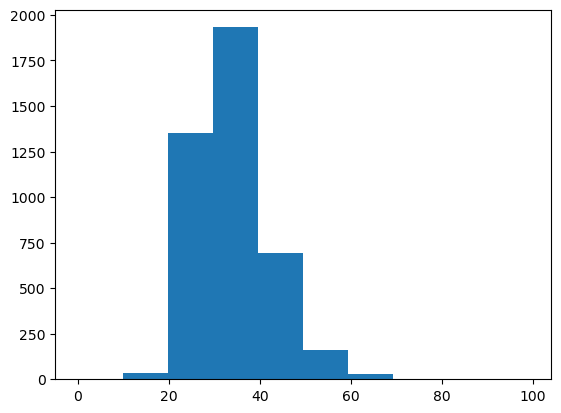

In [46]:
plt.hist(data['age'])

Now, for our descriptive analyses. Let's take a look and see if mental health diagnoses and support differ across age. Starting with mental health diagnoses.

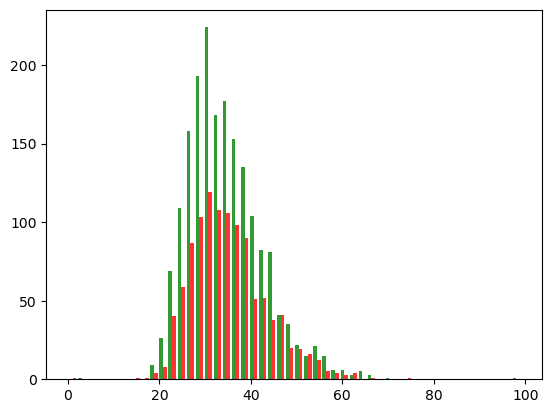

In [47]:
plt.hist([data.loc[data["mhd"] == "Y" , "age"], 
         data.loc[data["mhd"] == "N" , "age"]], 
         color=['g','r'], 
         alpha=0.8, 
         bins=50) #adjust bins 
plt.show()

In [48]:
#checking for normality of the two distributions. 
#Meets the assumptions, t-test is appropriate. 
#note, bug in the program so we have to remove np.nan 
stat, p = scipy.stats.levene(data.dropna().loc[data['mhd'] == "Y", "age"],
                            data.dropna().loc[data['mhd'] == "N", "age"]) #variance assumption
print(stat, p)

0.5359194143095152 0.46426723833292227


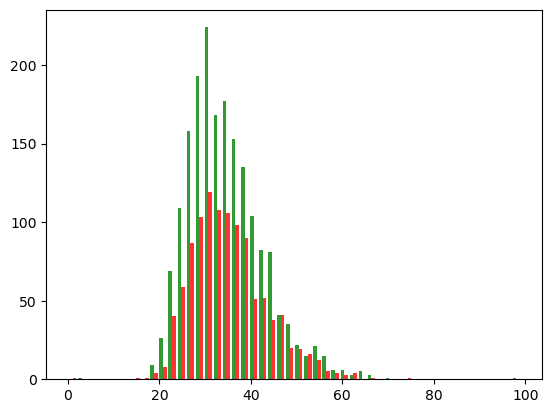

In [49]:
plt.hist([data.loc[data["mhd"] == "Y" , "age"], 
         data.loc[data["mhd"] == "N" , "age"]], 
         color=['g','r'], 
         alpha=0.8, 
         bins=50) #adjust bins 
plt.show()

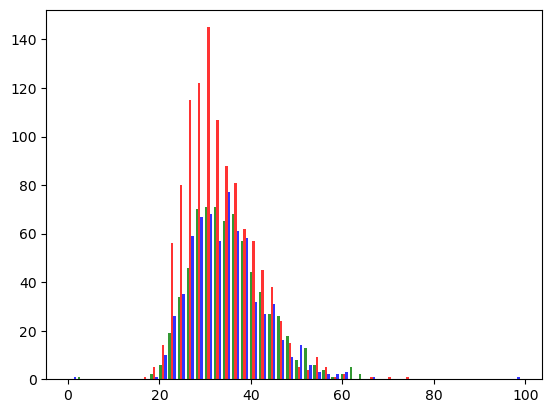

In [50]:
plt.hist([data.loc[data["resources"] == "Y" , "age"], 
         data.loc[data["resources"] == "N" , "age"],
         data.loc[data['resources'] == "U", "age"]], 
         color=['g','r', 'b'], 
         alpha=0.8, 
         bins=50) #adjust bins 
plt.show()

In [51]:
#variance assumptions. 
stat, p = scipy.stats.levene(data.dropna().loc[data['resources'] == "Y", "age"],
                            data.dropna().loc[data['resources'] == "N", "age"],
                            data.dropna().loc[data['resources'] == 'U', 'age']) #variance assumption
print(stat, p) #normal

1.5912920625184774 0.20407858126547815


Question: How does mental health diagnoses and support differ across gender?

In [52]:
gender = pd.read_sql_query('''
SELECT AnswerText AS gender, UserID AS id
FROM Answer
WHERE QuestionID = 2;
''', con)
gender.head()

,gender,id
0,Female,1
1,Male,2
2,Male,3
3,Male,4
4,Male,5


In [53]:
data = data.merge(gender, how="outer", on="id")
data.head()

,id,mhd,benefits,resources,conversations,poorsupport,goodsupport,age,gender
0,1261,N,NaN,N,Y,N,NaN,39.0,Male
1,1262,Y,N,Y,Y,N,NaN,29.0,Male
2,1263,N,N,N,Y,U,NaN,38.0,Male
3,1264,Y,NaN,NaN,NaN,N,NaN,43.0,Male
4,1265,Y,Y,N,N,Y,NaN,43.0,Female


In [54]:
data['gender'].describe()

count     4218
unique     101
top       Male
freq      2830
Name: gender, dtype: object

In [55]:
data['gender'].value_counts()

Male                                              2830
Female                                             914
male                                               212
female                                             110
-1                                                  24
                                                  ... 
male/androgynous                                     1
Transgender woman                                    1
AFAB                                                 1
female-bodied; no feelings about gender              1
ostensibly male, unsure what that really means       1
Name: gender, Length: 101, dtype: int64

In [56]:
data['gender'] = data['gender'].str.lower()
counts = data['gender'].value_counts()

for name, item in counts.items(): 
    print(name, item)

male 3043
female 1024
-1 24
nonbinary 9
non-binary 9
agender 6
genderqueer 5
genderfluid 4
none 4
trans woman 3
non binary 3
human 2
male-ish 2
female (trans) 2
fluid 2
queer 2
enby 2
trans man 2
other 2
i have a penis 1
p 1
nb 1
swm 1
she/her/they/them 1
trans female 1
nonbinary/femme 1
gender non-conforming woman 1
masculine 1
demiguy 1
female/gender non-binary. 1
cishet male 1
female-identified 1
questioning 1
a little about you 1
rr 1
agender trans woman 1
neuter 1
male leaning androgynous 1
guy (-ish) ^_^ 1
androgyne 1
all 1
nah 1
queer/she/they 1
something kinda male? 1
trans-female 1
non-binary and gender fluid 1
trans non-binary/genderfluid 1
transgender 1
i am a wookie 1
43 1
femmina 1
masculino 1
genderqueer/non-binary 1
male (or female, or both) 1
androgynous 1
male/genderqueer 1
mtf 1
genderqueer woman 1
none of your business 1
nb masculine 1
male 9:1 female, roughly 1
female or multi-gender femme 1
ostensibly male 1
other/transfeminine 1
genderfluid (born female) 1
transit

In [57]:
#Reducing down to 'male', 'female' and 'other'. 
#Did not use partial matching. 
mappings = {'-1':np.nan}
data['gender'] = data['gender'].replace(mappings)
data.loc[~data['gender'].isin(['male', 'female', np.nan]), 'gender'] = "nonbinary"
data['gender'].value_counts()

male         3043
female       1024
nonbinary     127
Name: gender, dtype: int64

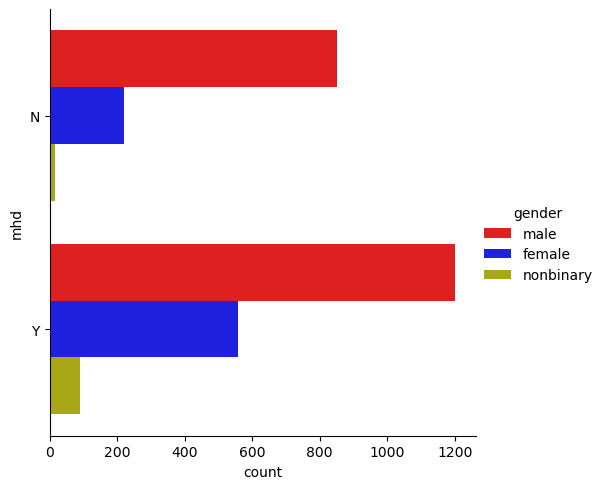

In [58]:
#visualization of mental health by gender. 
sb.catplot(kind='count', 
           data=data, 
           y='mhd', hue='gender', 
           palette=["r", "b", "y"])

In [59]:
#chi-square test
from scipy.stats import chi2_contingency
!pip install researchpy
import researchpy

In [60]:
crosstab, test_results, expected = researchpy.crosstab(data['mhd'], 
                                               data['gender'],
                                                      test="chi-square",
                                                      expected_freqs=True,
                                                      prop="cell")
print(test_results) #p-value w/ small relationship

                Chi-square test  results
0  Pearson Chi-square ( 2.0) =   64.4671
1                    p-value =    0.0000
2                 Cramer's V =    0.1482


In [61]:
table = pd.crosstab(data['mhd'], data['gender'])
print(table)

#percentages.
for column in table:
    print(table[column] / sum(table[column]))

gender  female  male  nonbinary
mhd                            
N          219   850         16
Y          558  1202         89
mhd
N    0.281853
Y    0.718147
Name: female, dtype: float64
mhd
N    0.41423
Y    0.58577
Name: male, dtype: float64
mhd
N    0.152381
Y    0.847619
Name: nonbinary, dtype: float64


So, mental health diagnoses are significantly different across gender. Based on the proportions, it looks like there are more people with mental health disorders than no mental health disorders. Relative to males, females and non-binary individuals have higher proportions of mental health disorders.

Now, what about mental health benefits and resources?

                Chi-square test  results
0  Pearson Chi-square ( 4.0) =   82.3378
1                    p-value =    0.0000
2                 Cramer's V =    0.1076
gender    female  male  nonbinary
benefits                         
N            118   624         14
U            225   815         22
Y            524  1150         61
benefits
N    13.610150
U    25.951557
Y    60.438293
Name: female, dtype: float64
benefits
N    24.101970
U    31.479336
Y    44.418694
Name: male, dtype: float64
benefits
N    14.432990
U    22.680412
Y    62.886598
Name: nonbinary, dtype: float64


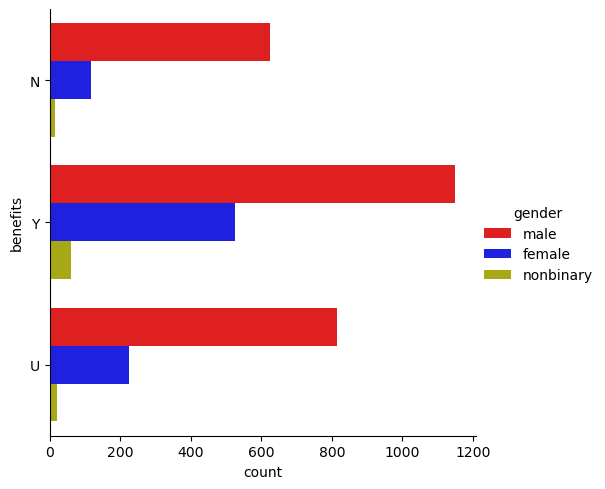

In [62]:
#visualization.
sb.catplot(kind='count', 
           data=data, 
           y='benefits', hue='gender', 
           palette=["r", "b", "y"])

#Chi-squared test
crosstab, test_results, expected = researchpy.crosstab(data['benefits'], 
                                               data['gender'],
                                                      test="chi-square",
                                                      expected_freqs=True,
                                                      prop="cell")
print(test_results) #p-value w/ small relationship

#Percentages. 
table = pd.crosstab(data['benefits'], data['gender'])
print(table)

for column in table:
    print((table[column] / sum(table[column])*100))

                Chi-square test  results
0  Pearson Chi-square ( 4.0) =   26.2377
1                    p-value =    0.0000
2                 Cramer's V =    0.0733
gender     female  male  nonbinary
resources                         
N             274   760         42
U             148   497         22
Y             235   436         25
resources
N    41.704718
U    22.526636
Y    35.768645
Name: female, dtype: float64
resources
N    44.890727
U    29.356172
Y    25.753101
Name: male, dtype: float64
resources
N    47.191011
U    24.719101
Y    28.089888
Name: nonbinary, dtype: float64


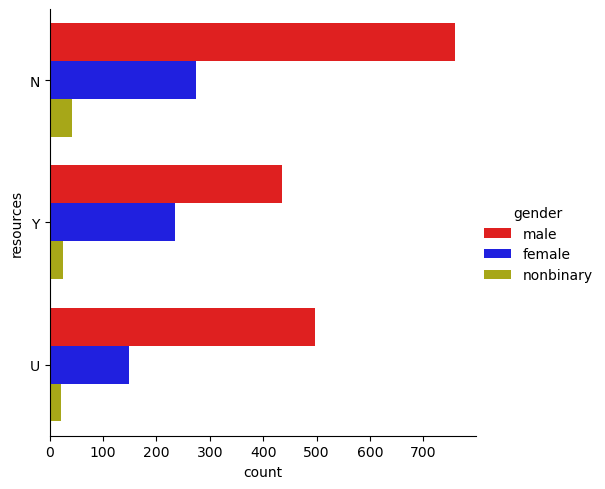

In [63]:
#visualization.
sb.catplot(kind='count', 
           data=data, 
           y='resources', hue='gender', 
           palette=["r", "b", "y"])

#Chi-squared test
crosstab, test_results, expected = researchpy.crosstab(data['resources'], 
                                               data['gender'],
                                                      test="chi-square",
                                                      expected_freqs=True,
                                                      prop="cell")
print(test_results) #p-value w/ small relationship

#Percentages.
table = pd.crosstab(data['resources'], data['gender'])
print(table)

for column in table:
    print((table[column] / sum(table[column])*100))

Interesting! So, while females and nonbinary individuals have higher proportions of mental health diagnoses, they also have a high proportion of mental health benefits and resources compared to males. Let's take a look at mental health conversations.

Now, onto job type! Let's look at mental health diagnoses, benefits, and support across job type.

In [65]:
job = pd.read_sql_query('''
SELECT AnswerText AS job, UserID AS id
FROM Answer
WHERE QuestionID=117;
''', con)
job.head()

,job,id
0,Back-end Developer,1261
1,Back-end Developer,1262
2,Front-end Developer,1262
3,Back-end Developer,1263
4,Supervisor/Team Lead,1264


In [66]:
data = data.merge(job, how='outer', on='id')
data.head()

,id,mhd,benefits,resources,conversations,poorsupport,goodsupport,age,gender,job
0,1261,N,NaN,N,Y,N,NaN,39.0,male,Back-end Developer
1,1262,Y,N,Y,Y,N,NaN,29.0,male,Back-end Developer
2,1262,Y,N,Y,Y,N,NaN,29.0,male,Front-end Developer
3,1263,N,N,N,Y,U,NaN,38.0,male,Back-end Developer
4,1264,Y,NaN,NaN,NaN,N,NaN,43.0,male,Supervisor/Team Lead


In [67]:
data['job'].value_counts()

Back-end Developer         737
Front-end Developer        502
DevOps/SysAdmin            282
Supervisor/Team Lead       277
Other                      187
Support                    168
One-person shop            161
Designer                   135
Executive Leadership       101
Dev Evangelist/Advocate     99
Sales                       31
HR                          12
Name: job, dtype: int64

Alright, let's take a look at mental health diagnosis across job type.

In [68]:
#Chi-squared test
crosstab, test_results, expected = researchpy.crosstab(data['mhd'], 
                                               data['job'],
                                                      test="chi-square",
                                                      expected_freqs=True,
                                                      prop="cell")
print(test_results) #insignificant; p > 0.01

                 Chi-square test  results
0  Pearson Chi-square ( 11.0) =   20.9622
1                     p-value =    0.0338
2                  Cramer's V =    0.0882


No difference in mental health diagnoses across job type. Let's look at benefits and resources.

In [69]:
#Chi-squared test
crosstab, test_results, expected = researchpy.crosstab(data['benefits'], 
                                               data['job'],
                                                      test="chi-square",
                                                      expected_freqs=True,
                                                      prop="cell")
print(test_results) #insignificant; p > 0.01

                 Chi-square test  results
0  Pearson Chi-square ( 22.0) =   37.1899
1                     p-value =    0.0225
2                  Cramer's V =    0.1003


In [ ]:
#Chi-squared test
crosstab, test_results, expected = researchpy.crosstab(data['resources'], 
                                               data['job'],
                                                      test="chi-square",
                                                      expected_freqs=True,
                                                      prop="cell")
print(test_results) #significant w/ small effect size

#visualization.
sb.catplot(kind='count', 
           data=data, 
           y='resources', hue='job', 
           palette=["r", "b", "y", "m", "g", "c"])

#Percentages.
table = pd.crosstab(data['resources'], data['job'])
print(table)

for column in table:
        print((table[column] / sum(table[column])*100))

So, no significant difference in benefits for mental health but there is a significant difference in mental health resources. For example, more HR people have mental health resources while the developers (front, back, DevOps) and one-person shops have less mental health resources.

In [70]:
#Chi-squared test
crosstab, test_results, expected = researchpy.crosstab(data['conversations'], 
                                               data['job'],
                                                      test="chi-square",
                                                      expected_freqs=True,
                                                      prop="cell")
print(test_results) #insignificant

                 Chi-square test  results
0  Pearson Chi-square ( 11.0) =   16.0195
1                     p-value =    0.1404
2                  Cramer's V =    0.0895


Let's move onto remote workers!

In [71]:
remote = pd.read_sql_query('''
SELECT AnswerText as remote, UserID as id
FROM Answer
WHERE QuestionID=118;
''',con)
remote.head()

,remote,id
0,Sometimes,1261
1,Never,1262
2,Always,1263
3,Sometimes,1264
4,Sometimes,1265


In [72]:
data = data.merge(remote, how='outer', on='id')
data.head()

,id,mhd,benefits,resources,conversations,poorsupport,goodsupport,age,gender,job,remote
0,1261,N,NaN,N,Y,N,NaN,39.0,male,Back-end Developer,Sometimes
1,1262,Y,N,Y,Y,N,NaN,29.0,male,Back-end Developer,Never
2,1262,Y,N,Y,Y,N,NaN,29.0,male,Front-end Developer,Never
3,1263,N,N,N,Y,U,NaN,38.0,male,Back-end Developer,Always
4,1264,Y,NaN,NaN,NaN,N,NaN,43.0,male,Supervisor/Team Lead,Sometimes


In [73]:
data['remote'].value_counts()

Sometimes    1432
Always        682
Never         578
Name: remote, dtype: int64

In [74]:
mappings = {'Sometimes':'Hybrid'}
data['remote'] = data['remote'].replace(mappings)
data['remote'].value_counts()

Hybrid    1432
Always     682
Never      578
Name: remote, dtype: int64

In [75]:
#Chi-squared test
crosstab, test_results, expected = researchpy.crosstab(data['mhd'], 
                                               data['remote'],
                                                      test="chi-square",
                                                      expected_freqs=True,
                                                      prop="cell")
print(test_results) #insignificant 

                Chi-square test  results
0  Pearson Chi-square ( 2.0) =    0.6374
1                    p-value =    0.7271
2                 Cramer's V =    0.0154


Mental health diagnoses not significantly different across remote work.

In [ ]:
#Chi-squared test
crosstab, test_results, expected = researchpy.crosstab(data['benefits'], 
                                               data['remote'],
                                                      test="chi-square",
                                                      expected_freqs=True,
                                                      prop="cell")
print(test_results) #significant w/ small effect size

#visualization.
sb.catplot(kind='count', 
           data=data, 
           y='benefits', hue='remote', 
           palette=["r", "b", "y", "m", "g", "c"])

#Percentages.
table = pd.crosstab(data['benefits'], data['remote'])
print(table)

for column in table:
    print((table[column] / sum(table[column])*100))

                Chi-square test  results
0  Pearson Chi-square ( 4.0) =   17.0952
1                    p-value =    0.0019
2                 Cramer's V =    0.0654
remote     Always  Hybrid  Never
resources                       
N             155     505    292
U             122     296    123
Y              87     288    132
resources
N    42.582418
U    33.516484
Y    23.901099
Name: Always, dtype: float64
resources
N    46.372819
U    27.180900
Y    26.446281
Name: Hybrid, dtype: float64
resources
N    53.382084
U    22.486289
Y    24.131627
Name: Never, dtype: float64


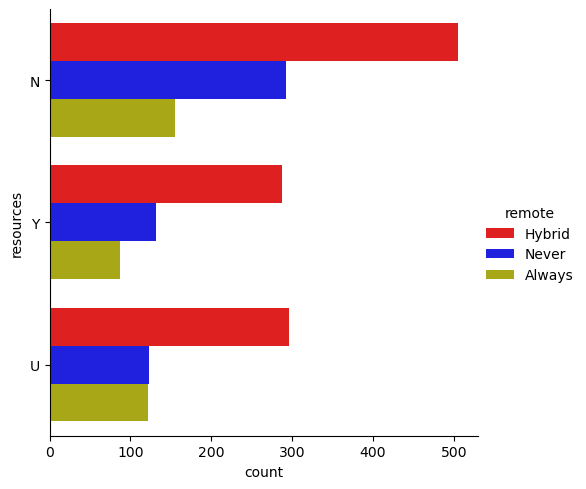

In [76]:
#Chi-squared test
crosstab, test_results, expected = researchpy.crosstab(data['resources'], 
                                               data['remote'],
                                                      test="chi-square",
                                                      expected_freqs=True,
                                                      prop="cell")
print(test_results) #significant w/ small effect size

#visualization.
sb.catplot(kind='count', 
           data=data, 
           y='resources', hue='remote', 
           palette=["r", "b", "y", "m", "g", "c"])

#Percentages.
table = pd.crosstab(data['resources'], data['remote'])
print(table)

for column in table:
    print((table[column] / sum(table[column])*100))

Interesting! Mental health benefits are higher for fully remove and hybrid workers. People who never did remote work also report less mental health resources. Interestingly, there is more remote workers who are unclear about their mental health benefits and resources

                Chi-square test  results
0  Pearson Chi-square ( 2.0) =   30.0088
1                    p-value =    0.0000
2                 Cramer's V =    0.1225
remote         Always  Hybrid  Never
conversations                       
N                  71     290    195
Y                 293     799    352
conversations
N    19.505495
Y    80.494505
Name: Always, dtype: float64
conversations
N    26.629936
Y    73.370064
Name: Hybrid, dtype: float64
conversations
N    35.648995
Y    64.351005
Name: Never, dtype: float64


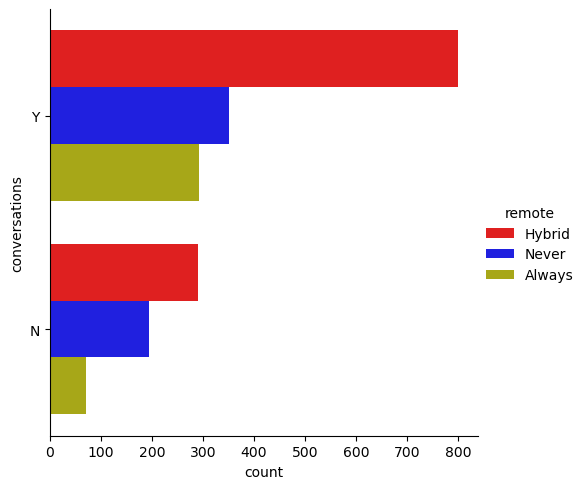

In [80]:
#Chi-squared test
crosstab, test_results, expected = researchpy.crosstab(data['conversations'], 
                                               data['remote'],
                                                      test="chi-square",
                                                      expected_freqs=True,
                                                      prop="cell")
print(test_results) #significant w/ small effect size

#visualization.
sb.catplot(kind='count', 
           data=data, 
           y='conversations', hue='remote', 
           palette=["r", "b", "y", "m", "g", "c"])

#Percentages.
table = pd.crosstab(data['conversations'], data['remote'])
print(table)

for column in table:
    print((table[column] / sum(table[column])*100))

People who have never done remote work are less likely to be willing to have conversations about mental health.

                Chi-square test  results
0  Pearson Chi-square ( 4.0) =   39.1740
1                    p-value =    0.0000
2                 Cramer's V =    0.0884
remote       Always  Hybrid  Never
poorsupport                       
N               260     572    215
U               130     309    191
Y               233     450    145
poorsupport
N    41.733547
U    20.866774
Y    37.399679
Name: Always, dtype: float64
poorsupport
N    42.975207
U    23.215627
Y    33.809166
Name: Hybrid, dtype: float64
poorsupport
N    39.019964
U    34.664247
Y    26.315789
Name: Never, dtype: float64


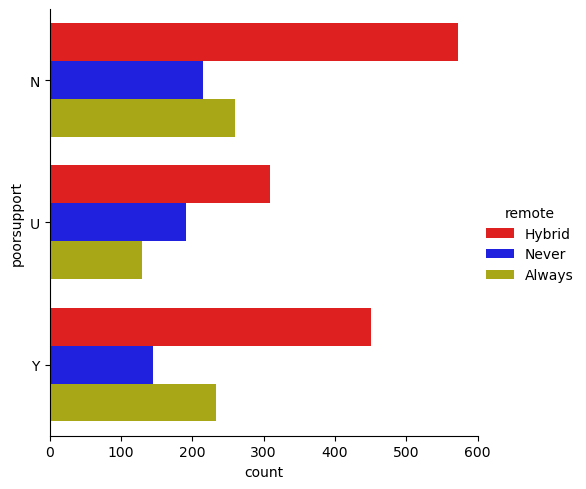

In [79]:
#Chi-squared test
crosstab, test_results, expected = researchpy.crosstab(data['poorsupport'], 
                                               data['remote'],
                                                      test="chi-square",
                                                      expected_freqs=True,
                                                      prop="cell")
print(test_results) #significant w/ small effect size

#visualization.
sb.catplot(kind='count', 
           data=data, 
           y='poorsupport', hue='remote', 
           palette=["r", "b", "y", "m", "g", "c"])

#Percentages.
table = pd.crosstab(data['poorsupport'], data['remote'])
print(table)

for column in table:
    print((table[column] / sum(table[column])*100))

In-person workers are more likely to have experienced poor support to mental health.

So, where are more support and benefits needed?
Training to upper management on how to handle mental health responses (noticed higher proportions of mhd in females and nonbinary individuals compared to males but less likely to be willing to discuss mental health).
Resources and support for African American individuals with mental health disorders. Higher proportions of mhd in African American individuals but no difference in mental health resources and support.
Resources and support needed for developers and DevOps; more government resources for indepenent one-person shops.
More benefits and support for people who have never done remote work. More clarification of benefits and support for remote workers.

Moving on to our final question! What do individuals in the survey believe would improve mental health support in their companies?

In [81]:
improvements = pd.read_sql_query('''
SELECT AnswerText as improvements
FROM Answer
WHERE QuestionID=86;
''',con)
improvements.head()

,improvements
0,They don't take it seriously
1,"raise awareness, talk about it to lessen the s..."
2,"Education and awareness, statistics, add suppo..."
3,"More support, less burnout and death marches"
4,I think tech is more internal and they don't r...


In [82]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer, PorterStemmer
import re
import warnings
warnings.filterwarnings('ignore')

In [83]:
#SOURCE: https://towardsdatascience.com/getting-started-with-text-analysis-in-python-ca13590eb4f7 
def preprocess(raw_text):
    
    #regular expression keeping only letters 
    letters_only_text = re.sub("[^a-zA-Z]", " ", raw_text)

    # convert to lower case and split into words -> convert string into list ( 'hello world' -> ['hello', 'world'])
    words = letters_only_text.lower().split()

    cleaned_words = []
    lemmatizer = PorterStemmer() #plug in here any other stemmer or lemmatiser you want to try out
    
    # remove stopwords
    stop_words = set(stopwords.words('english'))
    for word in words:
        if word not in stop_words:
            cleaned_words.append(word)
    
    # stemm or lemmatise words
    stemmed_words = []
    for word in cleaned_words:
        word = lemmatizer.stem(word)   #dont forget to change stem to lemmatize if you are using a lemmatizer
        stemmed_words.append(word)
    
    # converting list back to string
    return " ".join(stemmed_words)

5. Using NLP for extracting relevant keywords

In [85]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ishit\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [86]:
#using the above function to strip, lower, remove stopwords and 
improvements['processed'] = improvements['improvements'].apply(preprocess)
improvements['processed'].head()

0                                         take serious
1                         rais awar talk lessen stigma
2    educ awar statist add support write compani ha...
3                     support less burnout death march
4              think tech intern realli talk feel issu
Name: processed, dtype: object

In [87]:
#most common words
from collections import Counter
Counter(" ".join(improvements['processed']).split()).most_common(15)

[('health', 519),
 ('mental', 505),
 ('work', 326),
 ('issu', 265),
 ('peopl', 232),
 ('employe', 186),
 ('support', 182),
 ('talk', 166),
 ('industri', 142),
 ('think', 131),
 ('open', 131),
 ('make', 124),
 ('time', 122),
 ('need', 114),
 ('tech', 105)]

In [89]:
!pip install wordcloud

     -------------------------------------- 152.1/152.1 kB 4.6 MB/s eta 0:00:00


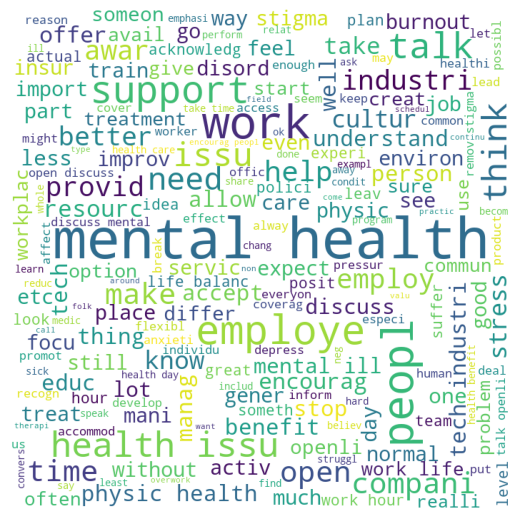

In [90]:
#nice library to produce wordclouds
from wordcloud import WordCloud

import matplotlib.pyplot as plt
all_words = '' 
#looping through all incidents and joining them to one text, to extract most common words
for arg in improvements['processed']: 

    tokens = arg.split()  
      
    all_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 700, height = 700, 
                background_color ='white', 
                min_font_size = 10).generate(all_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (5, 5), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()

In [91]:
from nltk.util import ngrams
n_gram = 2
n_gram_dic = dict(Counter(ngrams(all_words.split(), n_gram)))

for w in sorted(n_gram_dic, key=n_gram_dic.get, reverse=True)[0:20]:x
    print(w, n_gram_dic[w])

('mental', 'health') 408
('health', 'issu') 141
('physic', 'health') 53
('tech', 'industri') 52
('mental', 'ill') 44
('work', 'life') 25
('life', 'balanc') 23
('work', 'hour') 22
('open', 'discuss') 22
('remov', 'stigma') 21
('discuss', 'mental') 19
('talk', 'openli') 18
('talk', 'mental') 18
('health', 'day') 18
('health', 'care') 17
('health', 'benefit') 16
('peopl', 'mental') 16
('take', 'time') 16
('awar', 'mental') 16
('support', 'mental') 15


So, based on our initial analyses, the respondents think that the industry and employers can improve mental health by considering:

1. Improving work-life balance and work hours
2. Openly discussing and talking about mental health issues to improve awareness
3. Working on reducing stigma around mental health and mental health discussions
4. More mental health days, more benefits, and more healthcare
5. More discussion on the current benefits and resources for mental health

These can be applied in general to the industry and across companies, with special care taken for individuals with higher rates of mental health disorders and lower support. This includes African Americans, developers and devOps, and non-remote workers.